In [ ]:
!pip install big-fish

In [ ]:
import os
import bigfish
import bigfish.stack as stack
import bigfish.detection as detection
import bigfish.plot as plot
from google.colab import drive


In [ ]:
def choose_folder_colab():
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Specify the top-level folder in your Google Drive
    drive_folder = "/content/drive/MyDrive/"

    # List the contents of the drive_folder
    contents = os.listdir(drive_folder)

    # Print the contents and ask the user to select a folder
    print("Contents of your Google Drive:")
    for i, item in enumerate(contents):
        print(f"{i + 1}: {item}")

    try:
        choice = int(input("Enter the number of the folder you want to select: "))
        if 1 <= choice <= len(contents):
            selected_folder = os.path.join(drive_folder, contents[choice - 1])
            return selected_folder
        else:
            print("Invalid choice. Exiting.")
            return None
    except ValueError:
        print("Invalid input. Exiting.")
        return None

In [ ]:
def process_tiff_image(filename,channel):
    # Create the full path to the current image
    path = os.path.join(path_input, filename)

    # Load the image
    rna = stack.read_image(path)
    print(f"Processing image: {filename} (Channel {channel})")
    print("smfish channel")
    print("\r shape: {0}".format(rna.shape))
    print("\r dtype: {0}".format(rna.dtype))

    rna_mip = stack.maximum_projection(rna)
    print("smfish channel (2D maximum projection)")
    print("\r shape: {0}".format(rna_mip.shape))
    print("\r dtype: {0}".format(rna_mip.dtype))

    spot_detection(rna,rna_mip, channel)

In [ ]:
# Define a global variable
spots_post_clustering = None
clusters= None
def spot_detection(rna,rna_mip, channel):
    #Spot detection
    spots, threshold = detection.detect_spots(
        images=rna,
        return_threshold=True,
        voxel_size=(300, 103, 103),  # in nanometers (one value per dimension zyx)
        spot_radius=(350, 150, 150)  # in nanometers (one value per dimension zyx)
    )
    print("detected spots")
    print("\r shape: {0}".format(spots.shape))
    print("\r dtype: {0}".format(spots.dtype))
    print("\r threshold: {0}".format(threshold))

    #Kernel size and minimal distance
    spot_radius_px = detection.get_object_radius_pixel(
        voxel_size_nm=(300, 103, 103),
        object_radius_nm=(350, 150, 150),
        ndim=3
    )

    print("spot radius (z axis): {:0.3f} pixels".format(spot_radius_px[0]))
    print("spot radius (yx plan): {:0.3f} pixels".format(spot_radius_px[-1]))

    spots, threshold = detection.detect_spots(
        images=rna,
        return_threshold=True,
        log_kernel_size=(1.167, 1.456, 1.456),
        minimum_distance=(1.167, 1.456, 1.456)
    )

    print("detected spots")
    print("\r shape: {0}".format(spots.shape))
    print("\r dtype: {0}".format(spots.dtype))
    print("\r threshold: {0}".format(threshold))

    #Plot spot detection
    plot.plot_detection(rna_mip, spots, contrast=True)

    #Plot elbow curve
    plot.plot_elbow(
        images=rna,
        voxel_size=(300, 103, 103),
        spot_radius=(350, 150, 150))
    #Dense region decomposition
    spots_post_decomposition, dense_regions, reference_spot = detection.decompose_dense(
        image=rna,
        spots=spots,
        voxel_size=(300, 103, 103),
        spot_radius=(350, 150, 150),
        alpha=0.7,  # alpha impacts the number of spots per candidate region
        beta=1,  # beta impacts the number of candidate regions to decompose
        gamma=5)  # gamma the filtering step to denoise the image

    print("detected spots before decomposition")
    print("\r shape: {0}".format(spots.shape))
    print("\r dtype: {0}".format(spots.dtype), "\n")
    print("detected spots after decomposition")
    print("\r shape: {0}".format(spots_post_decomposition.shape))
    print("\r dtype: {0}".format(spots_post_decomposition.dtype))

    #Plot spot detection after decomposing regions
    plot.plot_detection(rna_mip, spots_post_decomposition, contrast=True)
    #Clusters detection
    global spots_post_clustering  # Declare the variable as global within the function
    global clusters
    spots_post_clustering, clusters = detection.detect_clusters(
        spots=spots_post_decomposition,
        voxel_size=(300, 103, 103),
        radius=350,
        nb_min_spots=2)
    print("detected spots after clustering")
    print("\r shape: {0}".format(spots_post_clustering.shape))
    print("\r dtype: {0}".format(spots_post_clustering.dtype), "\n")
    print("detected clusters")
    print("\r shape: {0}".format(clusters.shape))
    print("\r dtype: {0}".format(clusters.dtype))
    # plot
    plot.plot_detection(rna_mip,
                        spots=[spots_post_decomposition, clusters[:, :3]],
                        shape=["circle", "polygon"],
                        radius=[3, 6],
                        color=["red", "blue"],
                        linewidth=[1, 2],
                        fill=[False, True],
                        contrast=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of your Google Drive:
1: Danai-Angeliki-Mitsea-Module-3-Quiz-Module-3-Certificate-EFNA.pdf
2: EFNA.pdf
3: MHUUJJFOME.pdf
4: IMG_5354.JPG
5: IMG_5355.JPG
6: CV - D_Mitsea.pdf
7: Colab Notebooks
8: rf_final(1).ipynb
9: Random Forest 7_05.ipynb
10: Classroom
11: split channels.ijm
12: THESIS
13: DMSO
14: TSA
15: CPTH2 copy
16: JQ1
17: Output
18: ProcessedImages
19: SplitChannels
20: DMSO output
21: DMSO_output
Enter the number of the folder you want to select: 13
Selected folder: /content/drive/MyDrive/DMSO
Enter the channel (1 or 2) to process (or 'q' to quit): 2
Available TIFF images from Channel 2:
0: MCF7_AREG_DMSO_003.tif_C2.tif
1: MCF7_AREG_DMSO_001.tif_C2.tif
2: MCF7_AREG_DMSO_002.tif_C2.tif
3: MCF7_AREG_DMSO_005.tif_C2.tif
4: MCF7_AREG_DMSO_004.tif_C2.tif
5: MCF7_AREG_DMSO_006.tif_C2.tif
6: MCF7_AREG_DMSO_007.tif_C2.tif
7: MCF7_AREG_DMSO_009.tif

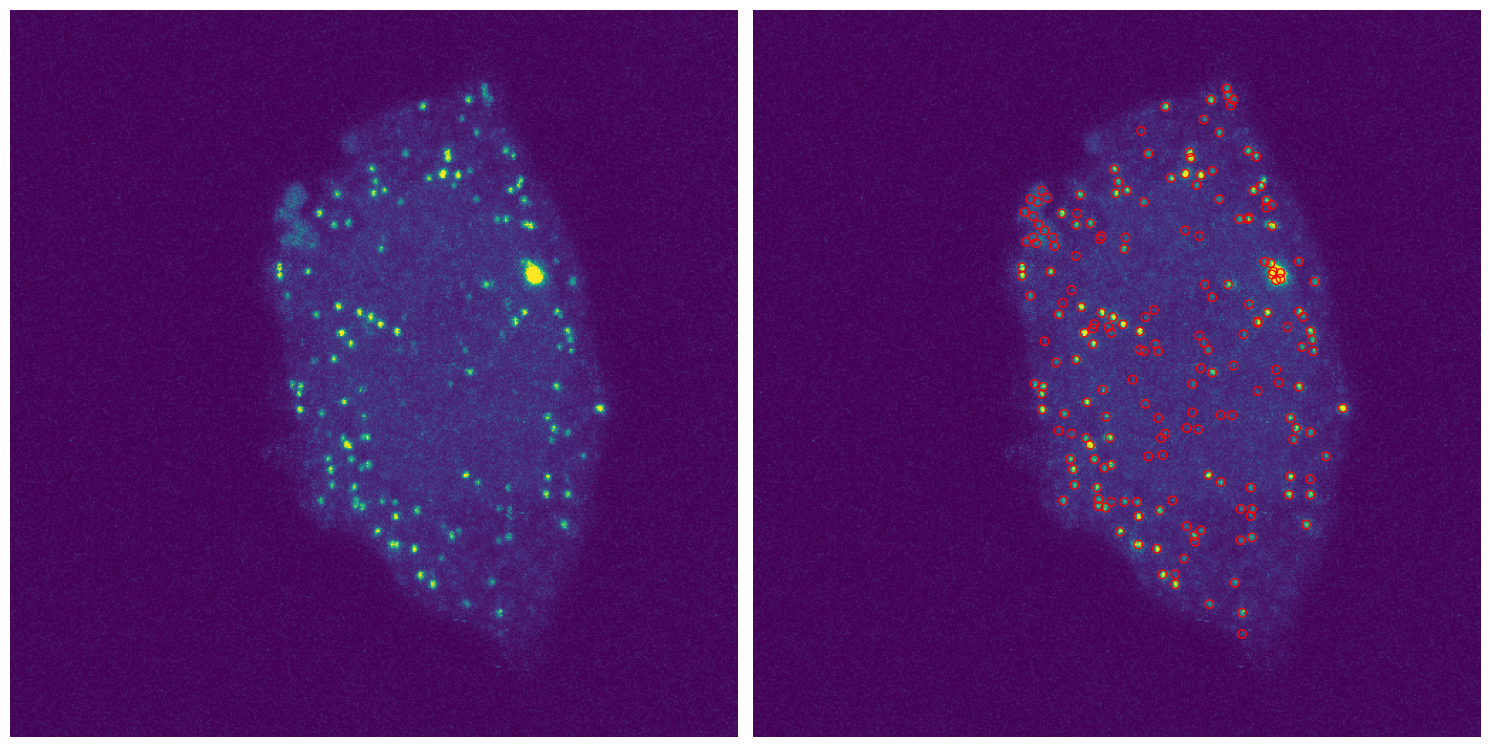

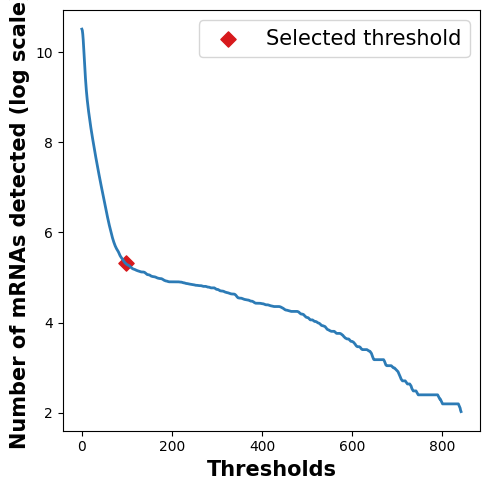

detected spots before decomposition
 shape: (197, 3)
 dtype: int64 

detected spots after decomposition
 shape: (246, 3)
 dtype: int64


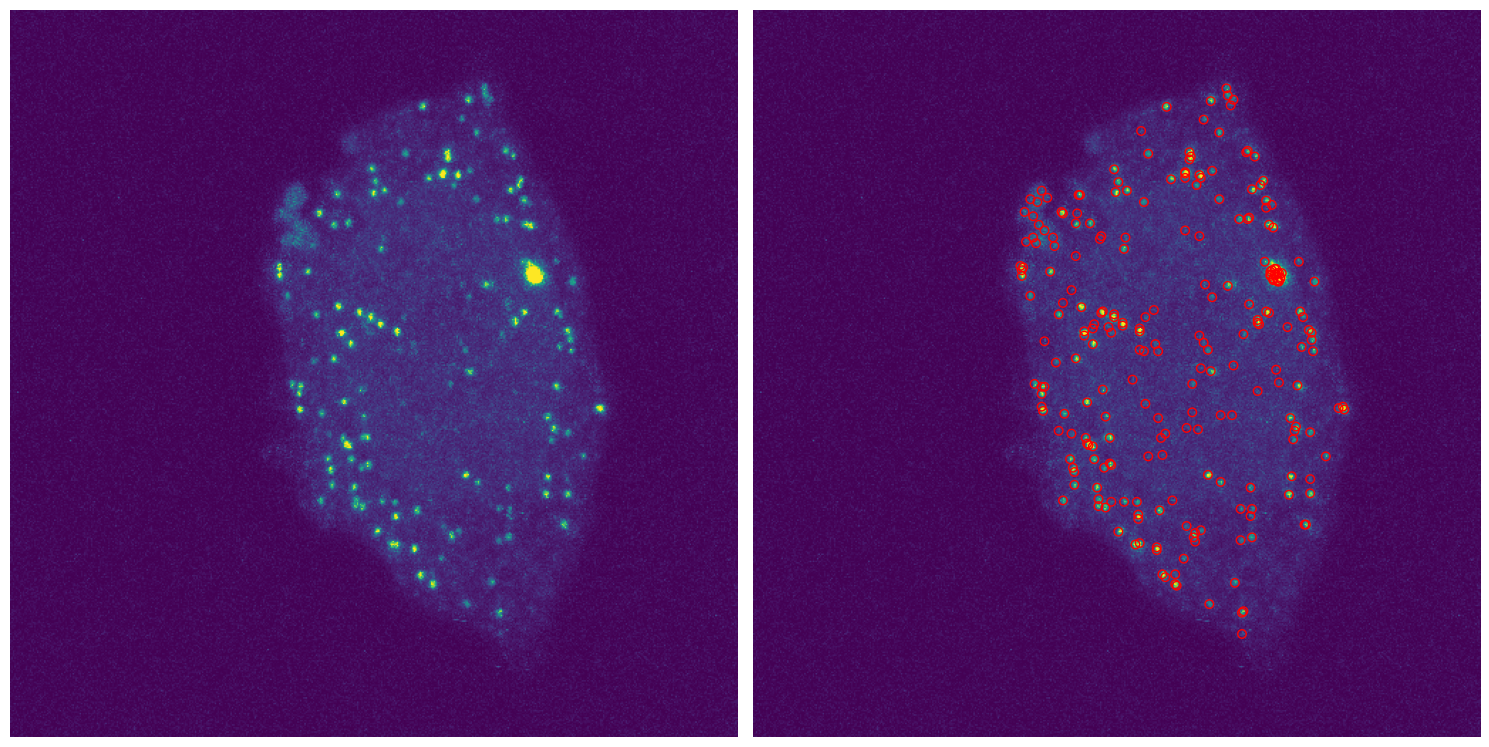

detected spots after clustering
 shape: (246, 4)
 dtype: int64 

detected clusters
 shape: (26, 5)
 dtype: int64


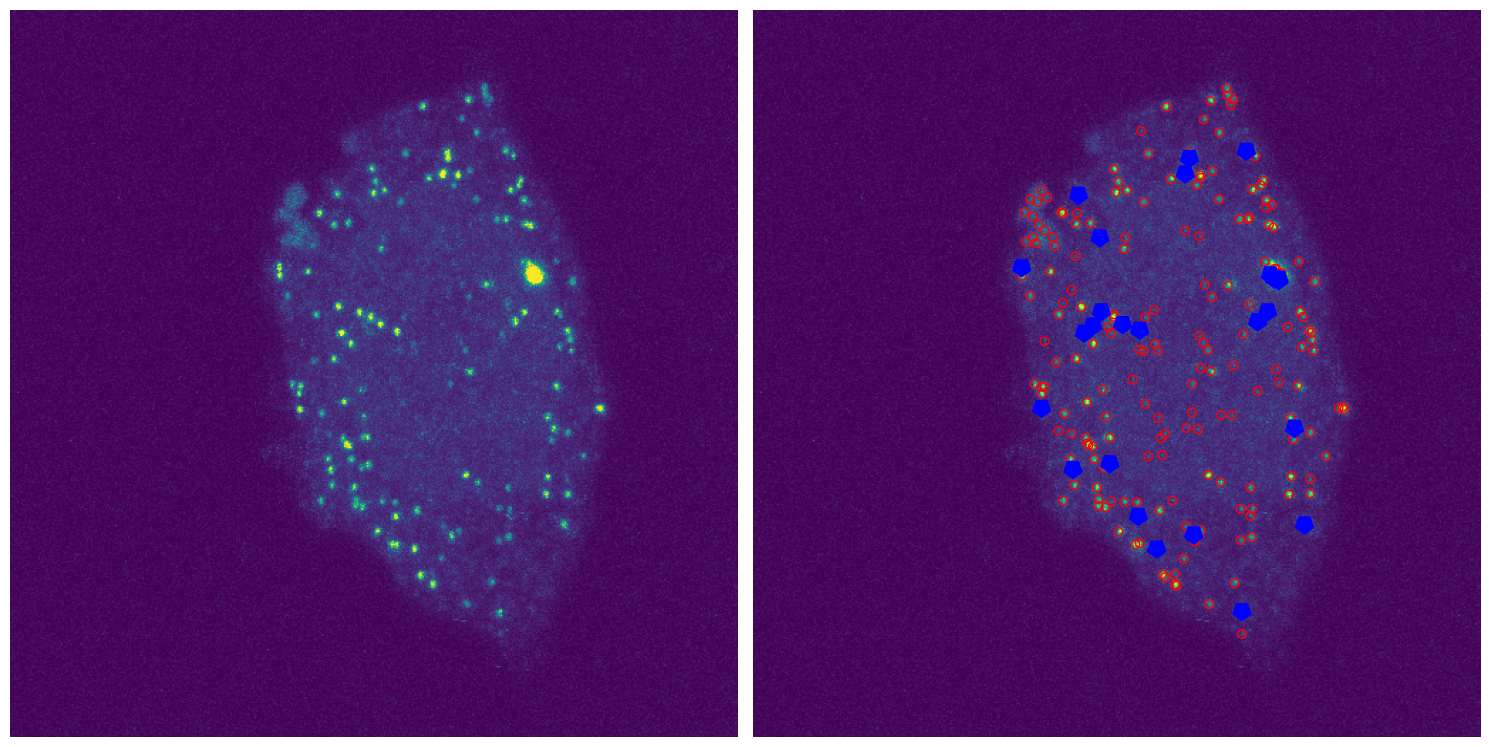

Enter the channel (1 or 2) to process (or 'q' to quit): q


In [ ]:
def process_images_interactively(path_input, path_output):
    global spots_post_clustering
    global clusters
    folder_name = os.path.basename(path_input)  # Get the name of the selected folder
    while True:
        # Choose the channel to process interactively
        channel = input("Enter the channel (1 or 2) to process (or 'q' to quit): ")
        if channel == 'q':
            break
        try:
            channel = int(channel)
            if channel not in [1, 2]:
                print("Invalid channel. Please enter 1 or 2.")
                continue
            # Get a list of all TIFF image filenames for the specified channel
            tiff_images = [filename for filename in os.listdir(path_input) if filename.endswith(".tif") and f"C{channel}" in filename]

            print(f"Available TIFF images from Channel {channel}:")
            for i, image in enumerate(tiff_images):
                print(f"{i}: {image}")

            choice = input("Enter the index of the image to process (or 'q' to choose another channel): ")

            if choice == 'q':
                continue

            try:
                choice_idx = int(choice)
                if 0 <= choice_idx < len(tiff_images):
                    selected_image = tiff_images[choice_idx]
                    process_tiff_image(selected_image, channel)

                    # Generate the output file names based on the selected image index and folder name
                    cell_name = f"cell_{choice_idx}"
                    spot_csv_name = f"{folder_name}_spots_{cell_name}.csv"
                    cluster_csv_name = f"{folder_name}_clusters_{cell_name}.csv"

                    # Save the data to CSV files
                    path_spots = os.path.join(path_output, spot_csv_name)
                    path_clusters = os.path.join(path_output, cluster_csv_name)

                    if spots_post_clustering is not None:
                        stack.save_data_to_csv(spots_post_clustering, path_spots)
                    if clusters is not None:
                        stack.save_data_to_csv(clusters, path_clusters)
                else:
                    print("Invalid index. Please enter a valid index.")
            except ValueError:
                print("Invalid input. Please enter a valid index or 'q' to choose another channel.")
        except ValueError:
            print("Invalid input. Please enter 1 or 2 for the channel.")
if __name__ == "__main__":
    # Allow the user to choose a folder interactively in Google Colab
    path_input = choose_folder_colab()

    if path_input:
        print(f"Selected folder: {path_input}")

        # Create the output folder
        path_output = f"{path_input}_output"  # Concatenate the input and "_output"
        os.makedirs(path_output, exist_ok=True)  # Create the folder if it doesn't exist

        # Process images in the selected folder here
        process_images_interactively(path_input, path_output)  # Pass the folder path as an argument

        # Save the data to CSV files after processing
        if spots_post_clustering is not None:
            spot_csv_name = f"{os.path.basename(path_input)}_spots_cell_0.csv"
            path_spots = os.path.join(path_output, spot_csv_name)
            stack.save_data_to_csv(spots_post_clustering, path_spots)

        if clusters is not None:
            cluster_csv_name = f"{os.path.basename(path_input)}_clusters_cell_0.csv"
            path_clusters = os.path.join(path_output, cluster_csv_name)
            stack.save_data_to_csv(clusters, path_clusters)


